In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

import keras
from keras.layers import Embedding
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout


In [3]:
df = pd.read_csv('../data.csv', sep=',', index_col='id')
subjects = ['calculus', 'algebra', 'discrete', 'ode', 'complex', 'mechanics',
            'prob_and_stat', 'pde', 'functional', 'optimization', 'random_proc', 'numerical']
df['mean'] = df[subjects].mean(axis=1)
df[df['year'] == 13]['ege'] = df['ege'] - 30
# select only 2013, 2014, 2015 courses
df = df[:-40]

# complexity
df['c'] = [0.06] * 20 + [0.03] * 20 + [0.21] * 20
# scam
df['s'] = [0.8] * 20 + [0.5] * 20 + [0.3] * 20

df['round'] = np.rint(df['mean'].values)

x = df[['s', 'c', 'ege']].values
y = df['round'].values - 3


/home/roman/PycharmProjects/Example/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [4]:
max_features = 1024

model = Sequential()
model.add(Embedding(max_features, output_dim=256))
model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(3, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [5]:
one_hot_labels = keras.utils.to_categorical(y, num_classes=3)
history = model.fit(x, one_hot_labels, epochs=100, batch_size=20, verbose=2, shuffle=True)



Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 0s - loss: 1.0807 - acc: 0.5667
Epoch 2/100
 - 0s - loss: 1.0230 - acc: 0.5000
Epoch 3/100
 - 0s - loss: 0.9661 - acc: 0.5000
Epoch 4/100
 - 0s - loss: 0.9136 - acc: 0.5167
Epoch 5/100
 - 0s - loss: 0.8936 - acc: 0.5000
Epoch 6/100
 - 0s - loss: 0.8667 - acc: 0.5000
Epoch 7/100
 - 0s - loss: 0.8519 - acc: 0.5167
Epoch 8/100
 - 0s - loss: 0.8389 - acc: 0.5667
Epoch 9/100
 - 0s - loss: 0.8267 - acc: 0.6833
Epoch 10/100
 - 0s - loss: 0.8007 - acc: 0.6333
Epoch 11/100
 - 0s - loss: 0.7549 - acc: 0.6500
Epoch 12/100
 - 0s - loss: 0.7192 - acc: 0.8000
Epoch 13/100
 - 0s - loss: 0.6444 - acc: 0.8000
Epoch 14/100
 - 0s - loss: 0.6095 - acc: 0.8333
Epoch 15/100
 - 0s - loss: 0.5542 - acc: 0.8167
Epoch 16/100
 - 0s - loss: 0.4212 - acc: 0.8500
Epoch 17/100
 - 0s - loss: 0.4258 - acc: 0.8333
Epoch 18/100
 - 0s - loss: 0.3408 - acc: 0.8500
Epoch 19/100
 - 0s - loss: 0.3079 - acc: 0.9000
Epoch 20/100
 - 0s - loss: 0.3086 - acc: 0.8667
E

In [6]:
x_test = np.array([
    [0.8, 0.06, 220], [0.8, 0.06, 224], [0.8, 0.06, 230], [0.8, 0.06, 234], [0.8, 0.06, 240], [0.8, 0.06, 245],
    [0.8, 0.06, 250], [0.8, 0.06, 260],
    
    [0.5, 0.03, 190], [0.5, 0.03, 195], [0.5, 0.03, 200], [0.5, 0.03, 205], [0.5, 0.03, 210], [0.5, 0.03, 215],
    [0.5, 0.03, 220], [0.5, 0.03, 225],
    
    [0.3, 0.21, 190], [0.3, 0.21, 195], [0.3, 0.21, 200], [0.3, 0.21, 205], [0.3, 0.21, 210], [0.3, 0.21, 215],
    [0.3, 0.21, 220], [0.3, 0.21, 225]
    
])
classes = model.predict(x_test, batch_size=10)
np.set_printoptions(precision=4, suppress=True)
classes


array([[0.2276, 0.4033, 0.0173],
       [0.9881, 0.0044, 0.001 ],
       [0.0016, 0.9912, 0.0008],
       [0.0019, 0.9916, 0.0006],
       [0.0071, 0.0098, 0.9874],
       [0.0076, 0.0156, 0.9833],
       [0.1904, 0.4626, 0.0167],
       [0.2167, 0.518 , 0.0111],
       [0.9885, 0.0035, 0.0011],
       [0.2175, 0.4696, 0.0135],
       [0.6938, 0.4132, 0.0012],
       [0.9889, 0.0044, 0.0009],
       [0.0018, 0.9922, 0.0005],
       [0.1897, 0.4873, 0.0135],
       [0.2276, 0.4033, 0.0173],
       [0.99  , 0.0047, 0.0007],
       [0.9885, 0.0035, 0.0011],
       [0.2175, 0.4696, 0.0135],
       [0.6938, 0.4132, 0.0012],
       [0.9889, 0.0044, 0.0009],
       [0.0018, 0.9922, 0.0005],
       [0.1897, 0.4873, 0.0135],
       [0.2276, 0.4033, 0.0173],
       [0.99  , 0.0047, 0.0007]], dtype=float32)

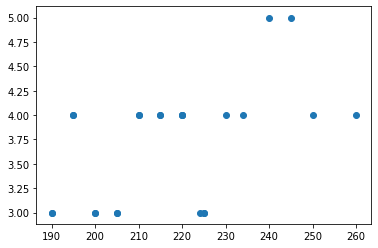

In [9]:
y = list(map(lambda y : y.argmax() + 3, classes))
plt.scatter(x_test[:, 2], y, marker='o')
